# Introduction: Recommender Engine For E-Commerce`

A recommendation engine is a system that suggests products, services, information to users based on analysis of data. Notwithstanding, the recommendation can derive from a variety of factors such as the history of the user and the behaviour of similar users.

The main purpose of this project is to create a recommendation engine which is led the customer see more goods as the way we preffered.The data comes from an e-commerce company. 

Multiple methods are used in this project as the need of the concept. Each step will be examine and the results will be shared. Before going further let's examine the data which is used in this project.

**Collaborative Filtering** essentially means that similar users like similar things.

**Content-based Fitering** essentially considers items/users features. 

Importing the required libraries:

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
conn=sqlite3.connect(":memory:")

# Exploratory Data Analysis

In [2]:
df=pd.read_csv('https://storage.googleapis.com/ty2020/reco.csv.gz');

Product and Image Link columns from main dataset is cataloged.

In [3]:
pr=df[['productcontentid','ImageLink']].drop_duplicates('productcontentid')

In [4]:
pd.set_option('display.max_colwidth', -1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [5]:
df.head(5)

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
0,20.08.2020 06:00,335057357,86386,39328996,919155,418,Sandalet,Kadın,319.98,14.0,Branded Shoes B,https://cdn.dsmcdn.com//ty1/product/media/images/20200427/20/316534/69600209/4/4_org_zoom.jpg
1,24.08.2020 10:00,337401625,59469,31903343,121,1827,Banyo Dolabı,Unisex,1195.56,3.0,Bahçe & Yapı Market & Hırdavat,https://cdn.dsmcdn.com//assets/product/media/images/20191010/9/355954/57359653/1/1_org_zoom.jpg
2,26.08.2020 19:00,338457012,51248,34726400,40,604,T-Shirt,Kadın,37.99,14.0,PL Woman,https://cdn.dsmcdn.com//assets/product/media/images/20200318/15/4526254/62064217/1/1_org_zoom.jpg
3,22.08.2020 11:00,336681542,29380,32920640,7651,604,T-Shirt,Kadın,24.99,6.0,Kadın A,https://cdn.dsmcdn.com//assets/product/media/images/20191127/17/824912/59665366/1/1_org_zoom.jpg
4,20.08.2020 19:00,335736916,68368,39035716,3395,599,Kazak,Kadın,79.90,16.0,Kadın A,https://cdn.dsmcdn.com//ty1/product/media/images/20200421/13/30718/69068887/1/1_org_zoom.jpg


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508228 entries, 0 to 508227
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   partition_date    508228 non-null  object 
 1   orderparentid     508228 non-null  int64  
 2   user_id           508228 non-null  int64  
 3   productcontentid  508228 non-null  int64  
 4   brand_id          508228 non-null  int64  
 5   category_id       508228 non-null  int64  
 6   category_name     508228 non-null  object 
 7   gender            475493 non-null  object 
 8   price             508228 non-null  float64
 9   color_id          375670 non-null  float64
 10  business_unit     508228 non-null  object 
 11  ImageLink         508228 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 46.5+ MB


*  **partition_date**: The date user bought the product.
*  **orderparentid**: The order id that all the product user bought in one order. 
*  **user_id**: Id of the user.
*  **productcontentid**: Id of the product.
*  **brand_id**: Id of the brand that products have.
*  **category_id** : Id of the category that product included.
*  **category_name**: Name of the category that product included.
*  **gender**: Gender assigned to the product.
*  **price**: Price of product.
*  **color_id**: Id of the color that products have.
*  **business_unit**: Business unit that products have
*  **ImageLink**: URL of the photograph of the product.




















As can be seen above only gender and color_id columns have null values.

## Category Insight

In [7]:
category=pd.DataFrame(df.groupby('category_name').size())
category.rename(columns={0:'size'},inplace=True)
category.sort_values(by='size',ascending=False,inplace=True)
category.reset_index(inplace=True)


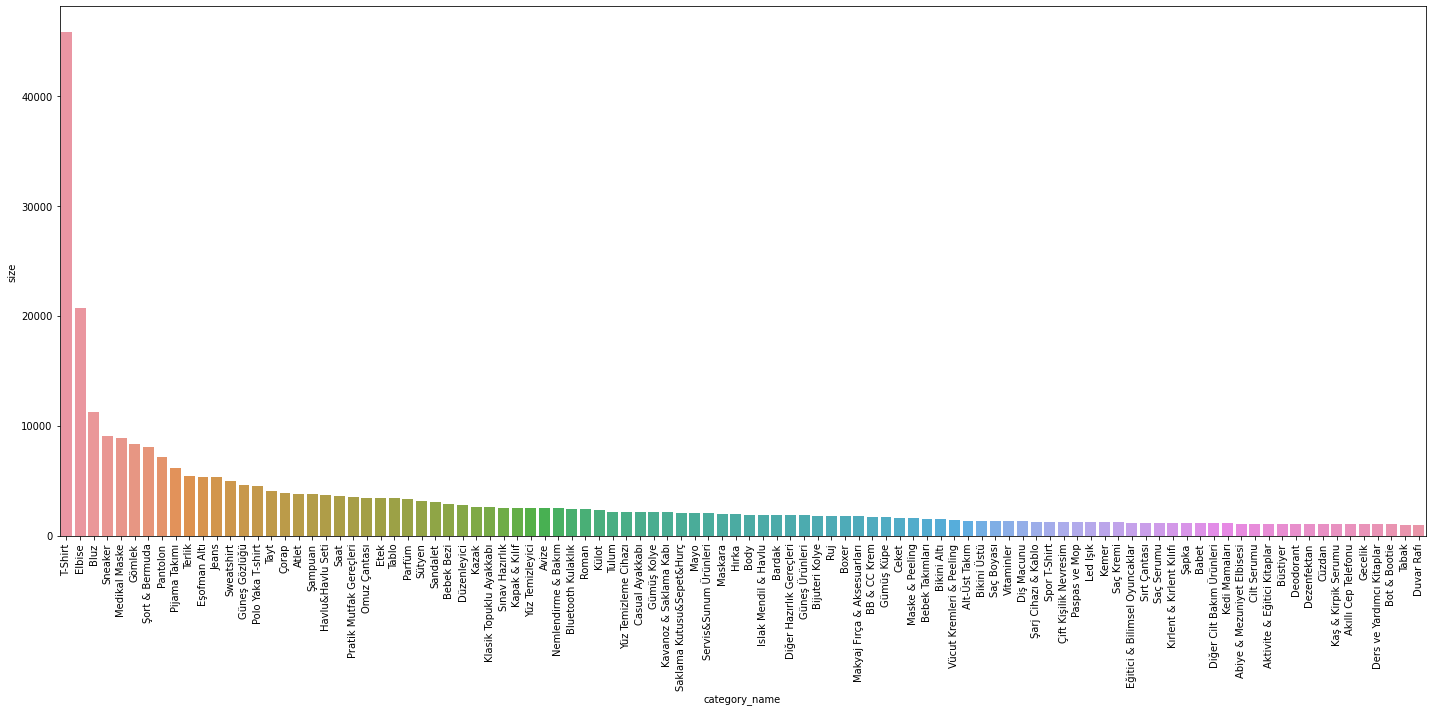

In [8]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='category_name',y='size',data=category.head(100))
plt.xticks(rotation=90)
plt.tight_layout()

In statistics and business, a **long tail of distributions** of numbers is the portion of the distribution having many occurrences far from the "head" or central part of the distribution.
There are only 100 category name displayed in this graph.Therefore the most of the sales comes from non-popular goods.This is an important part while creating a recommendation engine. **In user based recommendation engine category variety must be increased.**

## Business Unit Insight

In [9]:
bu=pd.DataFrame(df.groupby('business_unit').size())
bu.rename(columns={0:'size'},inplace=True)
bu.sort_values(by='size',ascending=False,inplace=True)
bu.reset_index(inplace=True)


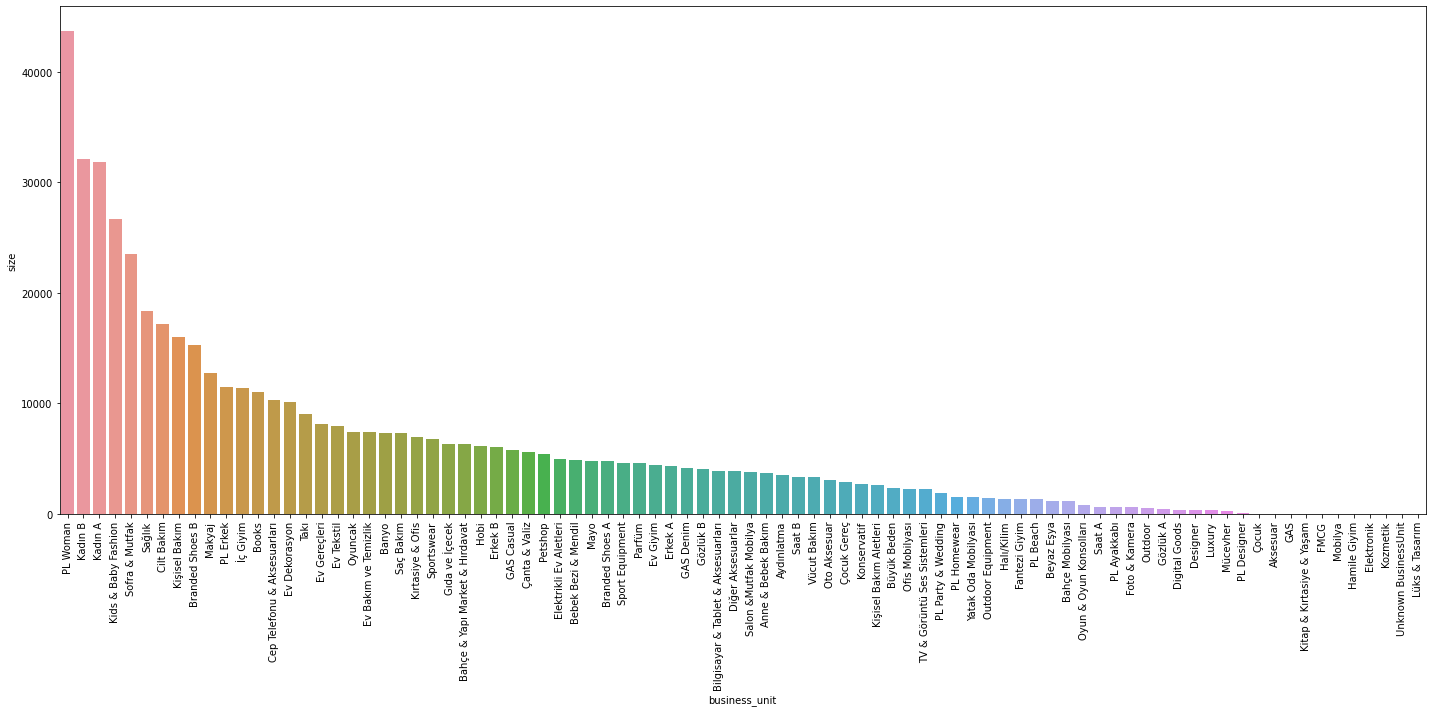

In [10]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='business_unit',y='size',data=bu.head(100))
plt.xticks(rotation=90)
plt.tight_layout()

Long Tail statistical pattern can be shown above.The hits are in the head. There are only 100 business_unit is shown in the graph. Therefore the variety of business unit must be increase in the recommendations that showed to the user.

## Gender Insight

Null data of gender column must be examined incase of pointing a meaningful insight.

In [11]:
df[df.gender=='Unisex'].groupby('business_unit').size().sort_values(ascending=False).head(50)


business_unit
Sofra & Mutfak                        22463
Books                                 10808
Kişisel Bakım                         10715
Cilt Bakım                            8771 
Ev Dekorasyon                         8371 
Cep Telefonu & Aksesuarları           7794 
Sağlık                                7159 
Ev Tekstil                            7039 
Oyuncak                               6834 
Ev Gereçleri                          6807 
Kırtasiye & Ofis                      6534 
Bahçe & Yapı Market & Hırdavat        5866 
Banyo                                 5783 
Petshop                               5313 
Gıda ve İçecek                        5134 
Ev Bakım ve Temizlik                  4996 
Bebek Bezi & Mendil                   4801 
Hobi                                  4278 
Sport Equipment                       3943 
Salon &Mutfak Mobilya                 3692 
Aydınlatma                            3412 
Elektrikli Ev Aletleri                3384 
Bilgisayar & Table

In examination of bussiness_unit of two gender type Unknown and Unisex are mostly similar. Due to that fact we turn Unknown gender to Unisex.

In [12]:
df.gender=df.gender.fillna('Unisex')
gender=pd.DataFrame(df.groupby('gender').size())
gender.rename(columns={0:'size'},inplace=True)
gender.sort_values(by='size',ascending=False,inplace=True)
gender.reset_index(inplace=True)

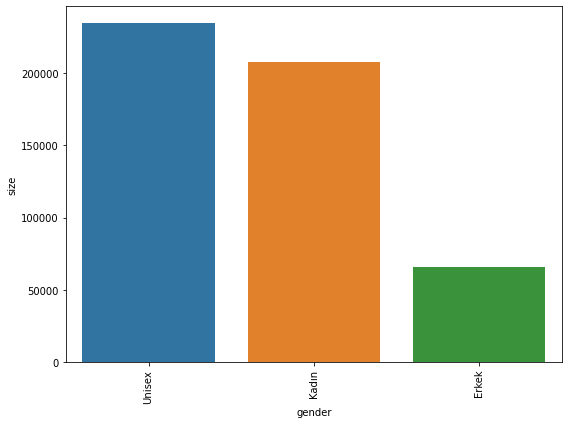

In [13]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='gender',y='size',data=gender)
plt.xticks(rotation=90)
plt.tight_layout()

As shown above unisex goods are more than other genders after filling the nan values. This graph shown the weights of gender through all the goods in e-commerce inventory that sold in that period.

## Price Insight

In [14]:
df.price.describe()

count    508228.000000
mean     91.766065    
std      260.402215   
min      0.010000     
25%      29.990000    
50%      49.990000    
75%      89.990000    
max      24149.290000 
Name: price, dtype: float64

Most of the price tag is in range to 90 TL.But there are many variety of price tag is exist in the data.

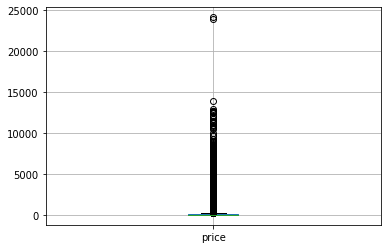

In [15]:
boxplot = df.boxplot(column=['price'])

When outliers inspected the price information of outliers are displayed with their own value. 

In [16]:
df[df.price>1000].groupby('category_name').size().sum()

3039

There are only 3039 products higher than the 1000 TL.

# Content Based Recommendation Engine

Content-based filtering is based on a single user’s interactions and preference. **Recommendations are based on the metadata collected from a user’s history and interactions**. For example, recommendations will be based on looking at established patterns in a user’s choice or behaviours. Returning information such as products or services will relate to your likes or views. With an approach like this, the more information that the user provides, the higher the accuracy.

## Cold Start / Baseline Model

Given the privacy and regulatory issues are important in some industries’ services, personal metadata and individual transactional data can be missing at the outset. These issues are commonly known as ‘cold start’ problems for recommender systems using this approach. **Cold start occurs when a recommender system cannot draw inferences for a query due to lack of sufficient information.** A particular form of the content-based recommendation system is a case-based recommender. **These evaluate items’ similarities and have been extensively deployed in e-commerce.**

## Determining Product Similarities 



### Determining Weight For Gender

In this section weight for gender which is assigned to product will be calculated through all the sales has been made without considering user behaviour.

In [17]:
df_gender=df[['gender','productcontentid']]

With SQL queries dataframe will be grouped and throughout every order the weight of the gender is calculated.

In [18]:
df_gender.to_sql("df_gender",conn,if_exists='replace')

In [19]:
gend= pd.read_sql(
    """
    select gender, count(1) n
    from df_gender
    group by gender
    order by n desc
    """,conn
)

In [20]:
gend['g_weight']= gend[['n']].transform(lambda x: x/x.sum())

Basically all gender products size divided by all products size individually.The weights are included to main data frame.

In [21]:
df1=df.merge(gend,on='gender').drop('n',axis=1)

### Determining Weight For Business Unit

In this section all the business unit weights are calculated by their weight on all the orders.

In [22]:
scenario1=df.drop(['partition_date','orderparentid','user_id','color_id', 'gender','price'],axis=1)


In [23]:
import sqlite3
conn=sqlite3.connect(":memory:")

In [24]:
scenario1.to_sql("scenario1",conn,if_exists='replace')

In [25]:
bu_unit= pd.read_sql(
    """
    select business_unit, count(1) n
    from scenario1
    group by business_unit
    order by n desc
    """,conn
)

In [26]:
bu_unit['b_weight']= bu_unit[['n']].transform(lambda x: x/x.sum())
bu_unit=bu_unit.drop('n',axis=1)
df1=df1.merge(bu_unit,on=['business_unit'])

All the weights that corresponds the business units are merged to main data frame.

### Determining Weight For Category 

In this section all the category weights are calculated by their weight on all the orders.

In [27]:
category=pd.read_sql(
    """
    select business_unit,category_name, count(1) n
    from scenario1
    group by  category_name ,business_unit
    order by n desc
    """
    ,conn)

In [28]:
category['c_weight']=category[['n']].transform(lambda x: x/x.sum())
category=category.drop('n',axis=1)
df1=df1.merge(category,on=['category_name','business_unit'])

## Construct Main Weight For Products

The weights are manipulated by the importance of weight as to reach desired recommendation engine.

In [29]:
df1['weight'] = df1.c_weight * 0.5 + df1.g_weight * 0.2 + df1.b_weight * 0.3
df1=df1.drop(['c_weight','g_weight','b_weight'],axis=1)

Due to make variety in the range of all the parts that we worked on data grouped by within a strategy. The main purpose is to show a user whom has no behavioural data in the database, to show variety of products but in the range of popular items. 

In [30]:
recommendation=df1.sort_values('weight',ascending=False).drop_duplicates(subset=['business_unit','gender'], keep="first").drop_duplicates(subset=['category_name','gender'],keep='first')

In [31]:
recommendation

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink,weight
24038,18.08.2020 08:00,333288981,51951,38921712,40,604,T-Shirt,Kadın,44.99,16.0,PL Woman,https://cdn.dsmcdn.com//ty1/product/media/images/20200428/14/343677/68856802/2/2_org_zoom.jpg,0.123336
63271,4.08.2020 09:00,326737203,56273,44166180,13904,604,T-Shirt,Unisex,59.99,3.0,Kadın A,https://cdn.dsmcdn.com//ty7/product/media/images/20200724/14/5858707/78210459/2/2_org_zoom.jpg,0.119430
128021,27.08.2020 08:00,338604754,100894,42486581,33263,1182,Elbise,Unisex,51.99,14.0,Kadın B,https://cdn.dsmcdn.com//ty5/product/media/images/20200627/14/3578105/75450374/1/1_org_zoom.jpg,0.116930
337669,6.08.2020 10:00,327838477,86133,39832331,972528,4025,Medikal Maske,Unisex,19.40,NaN,Sağlık,https://cdn.dsmcdn.com//ty4/product/media/images/20200609/8/2439990/70567614/1/1_org_zoom.jpg,0.111862
310184,20.08.2020 20:00,335881096,38634,29126659,943608,2267,Pratik Mutfak Gereçleri,Unisex,13.40,5.0,Sofra & Mutfak,https://cdn.dsmcdn.com//ty2/product/media/images/20200401/8/831141/52957596/1/1_org_zoom.jpg,0.109400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397963,15.08.2020 18:00,331639341,87462,35878048,10737,3214,Spor T-Shirt,Erkek,71.99,16.0,Outdoor,https://cdn.dsmcdn.com//assets/product/media/images/20200225/11/3490951/64100511/1/1_org_zoom.jpg,0.026320
364802,2.08.2020 20:00,326235762,54127,7089851,13024,380,Kemer,Erkek,26.95,14.0,Designer,https://cdn.dsmcdn.com//assets/product/images/184/22236695/1/1_org_zoom.jpg,0.026106
300792,2.08.2020 13:00,326105858,104032,35242399,896505,1262,Alyans,Erkek,85.00,3.0,Mücevher,https://cdn.dsmcdn.com//ty10/product/media/images/20200814/12/8049430/63946525/1/1_org_zoom.jpg,0.026015
477645,26.08.2020 19:00,338471758,48350,39927600,8392,1806,Cüzdan,Erkek,33.47,12.0,Aksesuar,https://cdn.dsmcdn.com//ty3/product/media/images/20200511/18/992719/70739882/1/1_org_zoom.jpg,0.025889


All the weights are explicitly gained from users not in the sense of user ranking,but in the sense of popularity ranking.

## Convert Textual Data Into a Vector Matrix Product 

tf-idf weight which signifies the importance of term in a document. It is a statistical measure of importance of word in a document. This weight is related to number of times word appear in a corpus but is offseted by frequency of words in corpus.

Tf in tf-idf weight measures frequency of terms in a document. And idf measure importance of that given term in given corpus.

**TF(t)** = (Number of times term 't' appears in a document) / (Total number of terms in the document)

**IDF(t)** = log_e(Total number of documents / Number of documents with term 't' in it)

Import required libraries.

In [32]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
df2=df1.copy()
df2=df2.sample(1000)

At first description column has been constructed for united the textual data from main database.

In [43]:
df2['description']=df2.business_unit.str.cat(" "+df2.category_name.str.cat(" "+df2.gender))

In [44]:
df2=df2[['productcontentid','description']]

Stop words has been used for ignoring the widely used words such as the or a. Because of the data has Turkish words, Turkish words are included to stop words.

In [45]:
stopw_turkish = stopwords.words('english') + stopwords.words('turkish')

tfidf_matrix constructed by fit_transform method.

In [46]:
tf = TfidfVectorizer(analyzer='word',stop_words='english')
tfidf_matrix=tf.fit_transform(df2.description)

Then we compute similarity between all products using SciKit Learn's linear_kernel 

Note that the tf-idf functionality in sklearn.feature_extraction.text can produce normalized vectors, in which case **cosine_similarity is equivalent to linear_kernel**

In [50]:
cosine_similarities=linear_kernel(tfidf_matrix, tfidf_matrix)


In [57]:
df2=df2.reset_index().drop('index',axis=1)

## Prediction

In [51]:
results= {}

First item is the item itself, so remove it.

To find the most related documents, we can use cosine_similarites.argsort() to get the most related document similarities values.

In [58]:
for idx, row in df2.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], df2['productcontentid'][i]) for i in similar_indices]
    results[row['productcontentid']] = similar_items[1:]

Iterate through each item's similar items and store the 100 most-similar.

Function to get a similar item product id from the description field, given an product id.

In [59]:
def item(id):
    return df2.loc[df2['productcontentid'] == id]['description'].tolist()[0]

Funtion to listing the products with the higher similarity with URL given in the ImageLink column.

In [60]:
list1=[]
list2=[]
def recommend(item_id, num):
    recs = results[item_id][:num]

    for rec in recs:
        list1.append(rec[1])
    for i in list1:
        list2.append(pr[pr['productcontentid']==i].iat[0,1])
    return list2

Recommendation for product content id ( item id ) 35608512.

In [61]:
recommend(35608512,5)

['https://cdn.dsmcdn.com//ty1/product/media/images/20200422/10/97787/67977431/2/2_org_zoom.jpg',
 'https://cdn.dsmcdn.com//ty8/product/media/images/20200722/10/5473277/76596904/1/1_org_zoom.jpg',
 'https://cdn.dsmcdn.com//assets/product/media/images/20200319/11/4541828/63193683/1/1_org_zoom.jpg',
 'https://cdn.dsmcdn.com//assets/product/media/images/20200306/10/4079595/63869478/1/1_org_zoom.jpg',
 'https://cdn.dsmcdn.com//assets/product/media/images/20200313/15/4409113/64968973/1/1_org_zoom.jpg']

# Collaborative Recommendation Engine

This module shows how to retrieve the top-10 items with highest rating
prediction. Firstly train an SVD algorithm on the dataset, and then
predict all the weight for the pairs (user, item) that are not in the training
set. We then retrieve the top-10 prediction for each user.

Firstly import all the necessary libraries.

In [ ]:
!pip install surprise

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

In [ ]:
df=df1.sample(5000)

Rating scale ii set to range 0 to 1 due to weights are given in the same range. 

First train an SVD algorithm on the dataset.

In [ ]:
reader=Reader(rating_scale=(0,1))
data=Dataset.load_from_df(df[['user_id','productcontentid','weight']],reader)
algo = SVD()
trainset = data.build_full_trainset()
algo.fit(trainset)


## Prediction

Than predict ratings for all pairs (u, i) that are NOT in the training set

In [ ]:
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

Return the top-N recommendation for each user from a set of predictions.

predictions: The list of predictions, as returned by the test method of an algorithm.

n(int): The number of recommendation to output for each user. 

Firstly, map the predictions to each user.

Then sort the predictions for each user and retrieve the highest ones.



In [ ]:
def get_top_n(predictions, n=10):

    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

Accuracy is calculated by RMSE metric.

In [ ]:
accuracy.rmse(predictions,verbose=True)

RMSE: 0.0833


0.08334527017878225

In [ ]:
top_n = get_top_n(predictions, n=10)

Every user and the products that recommended is appended to dictionary dict1.

Due to reach to the url of the images of the products dictionary keeps the users and all the product recommended specifically for the user. Data Frame 'pr' is a cataloge for the products and imagelinks. Through the users recommendation products id the imagelink is reachable. In this project all the recommended products are documented with streamlit through PyCharm and these files will be shared with this notebook.

# Conclusion

**Content Based Recommendation**

**PRO**:  Because of the weights given based on the popularity of the product and the data only based on the orders tf-idf vectorizer and cosine similarities generated satisfying outcomes when it comes to the content based recommendation.

**CON**: Due to the recommendation is not specific to the user the recommendation scope is larger than expected, that might mislead the marketing strategies.

**Collaborative Recomendation**

**PRO**: This engine specified for user and covers the popularity of product but in this case ratings given based on behaviour of user. 

**CON**: Not having sufficient amount of data that covers that user behaviours mislead the recommendation.
